In [30]:
import numpy as np
import sys
import os 
from functools import partial
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
from scipy.optimize import fmin
DATA_DIR = r"C:\Users\julia\VSCode\MSiD\data"

Exercise 1
W metodzie stałokrokowej nie mamy gwarancji osiągnięcia minimum, gdyż przy stałym kroku możemy nawet przeskoczyć minimum lokalne 

In [30]:
def steepest_descent(func, gradient, learning_rate, start_point, stop_condition, write_to=None):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to):
            print(f"Reached stop condition at {next_point}, value = {func(next_point)}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point


def func(X):
    return np.sum(X ** 2)

def gradient(X):
    return X * 2

def L1_norm(X):
    return np.sum(np.abs(X))

def L2_norm(X):
    return np.sqrt(np.sum(X ** 2))

def stop(current_point, next_point, error, write_to=None):
    computed = L2_norm(current_point - next_point)
    print(f"L2 = {computed}", file=write_to) 
    return computed < error 


In [4]:
h_i = 0.3
x_start = np.array([4, 4])
with open(os.path.join(DATA_DIR, "ex1.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.0065536 0.0065536]) = 8.589934592000008e-05


In [5]:
v1 = np.array([3, 4])
v2 = np.array([1, 1])

# Subtraction is element-wise
v1 - v2

array([2, 3])

In [6]:
scipy_min = fmin(func, x0=x_start)
func(scipy_min)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 80


9.503461544006107e-10

Exercise 2
Minimum tej funkcji znajduje się w punkcie (1, 1)

In [7]:
def func(X):
    return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2

def gradient(X):
    return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2, 
                     -5 * (X[0] ** 2 - X[1])])

h_i = 0.1
x_start = np.array([-0.5, 1])
with open(os.path.join(DATA_DIR, "ex2.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.1), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.43228954 0.07528693]) = 0.35342448875174604


In [8]:
h_i = 0.1
# Iteration 37
with open(os.path.join(DATA_DIR, "ex2_a.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

h_i = 0.01
with open(os.path.join(DATA_DIR, "ex2_b.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.001), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.89834828 0.78934951]) = 0.011114539348035525
f([0.89761505 0.78790576]) = 0.011275402470144028


In [9]:
func(np.array([1, 2]))

2.5

In [10]:
scipy_min = fmin(func, x0=x_start)
func(scipy_min)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 109


2.3379829250198353e-10

W porównaniu z metodą zmiennokrokową, w metodzie stałokrokowej nie wykonujemy dodatkowych obliczeń, więc możemy więcej iteracji zrobić

Exercise 3

In [11]:
def var_steepest_descent(func, gradient, learning_rate, start_point, stop_condition, write_to=None):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate(current_point, gradient_value, write_to) * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to):
            print(f"Reached stop condition at {next_point}, value = {func(next_point):.2f}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point


def update_learning_rate(X, gradient, write_to=None):
    
    def metric(alpha):
        # This is original function
        return np.sum((X - alpha * gradient) ** 2)
    
    min_alpha = fmin(metric, x0=0.01, disp=False)
    print(f"\talpha = {min_alpha[0]:.2f}", file=write_to)
    return min_alpha[0]

W metodzie zmiennokrokowej wykonujemy optymalizację kierunkową współczynnika kroku. Tutaj wybieramy takie $\alpha$, by minimalizowało funkcję wejściową

In [12]:
update_learning_rate(np.array([4, 4]), np.array([8, 8]))

	alpha = 0.50


0.5000000000000007

Tutaj potrzebowaliśmy jednego kroku, by znaleźć minimum. 

In [13]:
def func(X):
    return np.sum(X ** 2)

def gradient(X):
    return X * 2

x_start = np.array([4, 4])
with open(os.path.join(DATA_DIR, "ex3.txt"), mode='w') as f:
    result = var_steepest_descent(func, gradient, update_learning_rate, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

f([-5.32907052e-15 -5.32907052e-15]) = 5.679798517591285e-29


Exercise 4

In [14]:
points = []

def var_steepest_descent_2(func, gradient, learning_rate, start_point, stop_condition, write_to=None,
                           max_iter=1000):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate(i, write_to) * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        points.append(next_point)
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to) or i == max_iter:
            print(f"Reached stop condition at {next_point}, value = {func(next_point):.2f}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point

In [15]:
def lr1(i, write_to=None):
    next_step = 0.0007 * i 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr2(i, write_to=None):
    next_step = 0.000701 * i 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr3(i, write_to=None):
    next_step = 0.03 * np.sqrt(i) 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr4(i, write_to=None):
    next_step = 0.03* np.power(i, 1 / 4)
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step


In [16]:
methods = [lr1, lr2, lr4]
names = ['a', 'b', 'd']

def func(X):
    return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2

def gradient(X):
    return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2, 
                     -5 * (X[0] ** 2 - X[1])])


x_start = np.array([-0.5, 1])

for method, name in zip(methods, names):
    with open(os.path.join(DATA_DIR, f"ex4{name}.txt"), mode='w') as f:
        result = var_steepest_descent_2(func, gradient, method, x_start, partial(stop, error=0.001), write_to=f)
        print(f"[{name}]: f({result}) = {func(result)}")

[a]: f([0.99054452 0.97963282]) = 9.537848629279827e-05
[b]: f([0.99059457 0.9797404 ]) = 9.436956874481766e-05
[d]: f([0.9889871  0.97629347]) = 0.00012940214379883423


In [17]:
x_start = np.array([-0.5, 1])

with open(os.path.join(DATA_DIR, f"ex4_c.txt"), mode='w') as f:
    result = var_steepest_descent_2(func, gradient, lr3, x_start, partial(stop, error=0.001), write_to=f,
                                        max_iter=300)
    print(f"[{name}]: f({result}) = {func(result)}")

C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\2746051287.py:34: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(X ** 2))
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:8: RuntimeWarning: overflow encountered in double_scalars
  return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2,
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:9: RuntimeWarning: overflow encountered in double_scalars
  -5 * (X[0] ** 2 - X[1])])
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([10 * X[0

[d]: f([nan nan]) = nan


In [18]:
len(points)
points = np.array(points)

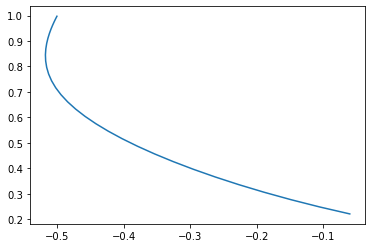

In [19]:
import matplotlib.pyplot as plt 

n_points = 33

plt.plot(points[:n_points, 0], points[:n_points, 1])

In [74]:
def steepest_descent_with_contraint(func, gradient, learning_rate, start_point,
                                     stop_condition, write_to=None, max_iter=1000):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point, i)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        value = func(next_point, i)
        print(f"\tf({next_point}) = {value}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to) or i == max_iter:
            print(f"Reached stop condition at {next_point}, value = {value}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point

def stop(current_point, next_point, error, write_to=None):
    computed = L2_norm(current_point - next_point)
    print(f"L2 = {computed}", file=write_to) 
    return computed < error 


In [75]:
class func:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)
        print(f'\tfunc c_{i} = {self._rate}', file=self.write_to)

    def __call__(self, x, i):
        value = (x + 1) * x * (x - 1) + self._rate * (max(0, (-x - 1)) ** 2 + max(0, (x - 1)) ** 2)
        self.update_rate(i)
        return value

class gradient:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)

    def is_feasible(self, x):
        return (-x - 1) <= 0 and (x - 1) <= 0

    def __call__(self, x, i):
        result = 3 * x ** 2 - 1
        if x == 1 or x == -1:
            return 0
        if not self.is_feasible(x):
            result += 2 * self._rate * (((-x -1) * (-1)) + ((x - 1)))
        self.update_rate(i)
        print(f'\tgrad c_{i} = {self._rate}', file=self.write_to)
        return result 

start_c = 0.6
# def update_rate(r, i):
  #   return 2 ** (i -1) * r

def update_rate(r, i):
    return i

with open(os.path.join(DATA_DIR, f"ex3_constraint2.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = -1.75
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)



-0.5879821200367064


Funkcja nie jest rozniczkowalna w x = - 1 ani w x = 1, ponieważ jest to punkt 'sklejenia'

In [79]:
start_c = 1
def update_rate(r, i):
    return i

with open(os.path.join(DATA_DIR, f"ex3_constraint.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = 0.7
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

0.7


In [81]:
class func:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)
        print(f'\tfunc c_{i} = {self._rate}', file=self.write_to)

    def __call__(self, x, i):
        value = (x + 3) * x * (x - 3) + self._rate * (max(0, (-x - 2)) ** 2 + max(0, (x - 2)) ** 2)
        self.update_rate(i)
        return value

class gradient:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)

    def is_feasible(self, x):
        return (-x - 2) <= 0 and (x - 2) <= 0

    def __call__(self, x, i):
        result = 3 * x ** 2 - 9
        if x == 2 or x == -2:
            return 0
        if not self.is_feasible(x):
            result += 2 * self._rate * (((-x -2) * (-1)) + ((x - 2)))
        self.update_rate(i)
        print(f'\tgrad c_{i} = {self._rate}', file=self.write_to)
        return result 

In [84]:
start_c = 0.6
# def update_rate(r, i):
  #   return 2 ** (i -1) * r

def update_rate(r, i):
    return i

with open(os.path.join(DATA_DIR, f"ex4_constraint1.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = -0.75
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

with open(os.path.join(DATA_DIR, f"ex4_constraint2.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = 0
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

with open(os.path.join(DATA_DIR, f"ex4_constraint1.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = 0.75
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

1.6345786125985085
1.63487788012431
1.6330162965566544


In [64]:
class GDCRegularization:

    def __init__(self, function, penalty_function, gradient, penalty_gradient, constraint,
                                         learning_rate, precision):
        self.function = function
        self.penalty_function = penalty_function
        self.gradient = gradient
        self.penalty_gradient = penalty_gradient
        self.constraint = constraint
        self.learning_rate = learning_rate
        self.penalty_term = None 
        self.penalty_term_increase = None
        self.precision = precision

        self.function_value = 0.0
        self.penalty_value = 0.0
        self.value = 0.0
        self.gradient_value = 0.0 
        self.penalty_term = 0.0 
        self.current_point = None
        self.next_point = None 

    def l2_norm(self):
        return np.sqrt(np.sum((self.current_point - self.next_point) ** 2))
    
    def stop_condition(self):
        return self.l2_norm() < self.precision

    def train(self, penalty_term, penalty_term_increase, start_point):

        self.current_point = start_point
        self.penalty_term = penalty_term
        i = 1

        while True:

            add_penalty = not self.constraint(self.current_point)

            self.function_value = self.function(self.current_point)
            self.penalty_value = penalty_term * add_penalty * self.penalty_function(self.current_point)
            self.value = self.function_value + self.penalty_value

            self.gradient_value = self.gradient(self.current_point) + add_penalty * self.penalty_term * self.penalty_gradient(self.current_point)

            step_size = self.learning_rate * self.gradient_value
            self.next_point = self.current_point - step_size

            yield self.current_point, self.value

            if self.stop_condition():
                break 
            i += 1
            self.current_point = self.next_point
            self.penalty_term = penalty_term_increase(**{'penalty_term': self.penalty_term, 'i': i})

        

    def format(self):
        self.current_point = np.round(self.current_point, 2)
        return f"F({self.current_point}) = f({self.current_point}) + {self.penalty_term} * S({self.current_point}) = {self.value}, g={self.gradient_value}, l2={self.l2_norm()}"


Input function is $$ f(x_1, x_2) = x_1^2 + x_2^2$$

with equality constraint $$ h(x_1, x_2) = x_1 + x_2 - 2 = 0$$

where the function to optimize, without constraint, will be $$ F_i(x_1, x_2) = f(x_1, x_2) + c_i (h(x_1, x_2))^2$$

and $ c_i = i, \ i = 1, ..$, with condition that $\lim_{i -> \infty} = \infty$

We can solve for this without GDC, but the solution should be close anyway

In [65]:
def func1(x):
    return np.sum(x ** 2)

def grad1(x):
    return 2 * x 

def constraint1(x):
    return (np.sum(x) - 2) == 0

def penalty1(x):
    return (np.sum(x) - 2) ** 2

def penalty_grad1(x):
    return np.array([2 * (np.sum(x) - 2)])

c_1 = 1 

def next_c(**kwargs):
    return kwargs['i']

lr = 0.01
precision = 0.01
start_point = np.array([0.2, 0.3])

algorithm = GDCRegularization(func1, penalty1, grad1, penalty_grad1, constraint1, lr, precision)

gen = algorithm.train(c_1, next_c, start_point)

results = []

for (curr_point, value) in gen:
    results.append((*curr_point, value))
    print(algorithm.format())

print(algorithm.format())

F([0.2 0.3]) = f([0.2 0.3]) + 1 * S([0.2 0.3]) = 2.38, g=[-2.6 -2.4], l2=0.03538361202590828
F([0.23 0.32]) = f([0.23 0.32]) + 2 * S([0.23 0.32]) = 2.258552, g=[-5.348 -5.152], l2=0.07436895051027681
F([0.28 0.38]) = f([0.28 0.38]) + 3 * S([0.28 0.38]) = 2.0281493407999998, g=[-7.51104 -7.31896], l2=0.10141369189769203
F([0.35 0.45]) = f([0.35 0.45]) + 4 * S([0.35 0.45]) = 1.75916554690432, g=[-8.8644192 -8.6761808], l2=0.12648340100941682
F([0.44 0.54]) = f([0.44 0.54]) + 5 * S([0.44 0.54]) = 1.526227966766909, g=[-9.32647082 -9.14199718], l2=0.1298546372751814
F([0.54 0.63]) = f([0.54 0.63]) + 6 * S([0.54 0.63]) = 1.3807394555007313, g=[-8.96631324 -8.78552908], l2=0.12085513215917693
F([0.63 0.71]) = f([0.63 0.71]) + 7 * S([0.63 0.71]) = 1.3373430053856163, g=[-7.97494769 -7.79777921], l2=0.11227624299082455
F([0.71 0.79]) = f([0.71 0.79]) + 8 * S([0.71 0.79]) = 1.3780891850483763, g=[-6.60999423 -6.43636912], l2=0.09135803279071666
F([0.77 0.86]) = f([0.77 0.86]) + 9 * S([0.77 0.86

In [62]:
results

[(0.2, 0.3, 2.38),
 (0.226, 0.324, 2.258552),
 (0.27948, 0.37552, 2.0281493407999998),
 (0.35459040000000003, 0.44870960000000004, 1.75916554690432),
 (0.44323459200000004, 0.535471408, 1.526227966766909),
 (0.53649930016, 0.62689137984, 1.3807394555007313),
 (0.6261624325568, 0.7147466706432, 1.3373430053856163),
 (0.705911909457664, 0.792724462782336, 1.3780891850483763),
 (0.7720118517101108, 0.8570881539682893, 1.4681692086414069),
 (0.8233336136537965, 0.9067083898668115, 1.5728756634902525),
 (0.8608585406765991, 0.9425658213653536, 1.6681497361006008),
 (0.8868880102138376, 0.9669611452888169, 1.7429442685066079),
 (0.9042264526889237, 0.9826981250624035, 1.7961071338602732),
 (0.9155415334198, 0.9924437723458104, 1.8316276446397097)]

[Text(0.5, 0, 'x1'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'F')]

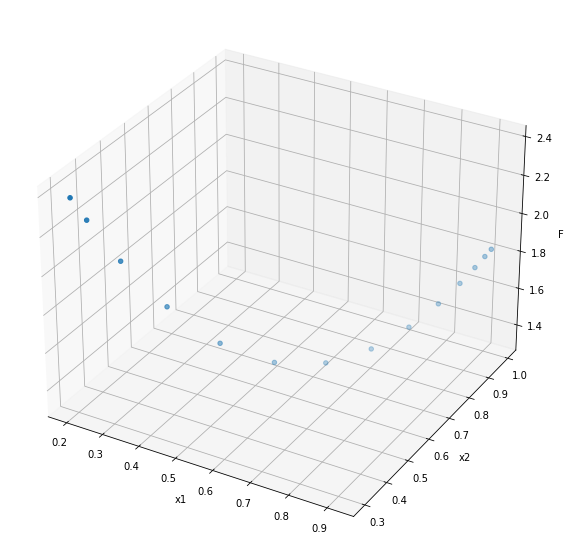

In [66]:
x, y, z = (zip(*results))
x, y, z = np.array(x), np.array(y), np.array(z)
# x, y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 10))

# ls = LightSource(270, 45)

# rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')

ax.scatter3D(x, y, z, cmap='cividis')
ax.set(
    xlabel='x1', 
    ylabel='x2',
    zlabel='F'
)

Input function is $$ f(x_1, x_2) = (x_1 - 1)(x_2 - 1)x_1x_2$$
under inequality constraint $$ g(x_1, x_2) = (x_1 - 1)^2 + x_2^2 - 1 \leq 0$$

The function to minimize is $$ F_i(x_1, x_2) = f(x_1, x_2) + max(0, g(x_1, x_2))^2$$

In [85]:
def func2(x):
    return (x[0] - 1) * (x[1] - 1) * x[0] * x[1]

def grad2(x):
    return np.array([(2 * x[0] - 1)* (x[1] ** 2 - x[1]), (2 * x[1] - 1)* (x[0] ** 2 - x[0])])

def constraint2(x):
    return (x[0] - 1) ** 2 + x[1] ** 2 - 1 <= 0

def penalty2(x):
    return max(0, (x[0] - 1) ** 2 + x[1] ** 2 - 1) ** 2

def penalty_grad2(x):
        return np.array([2 * (penalty2(x) * 2 * (x[0] - 1)), 2 * (penalty2(x) * 2 * x[1])])

c_1 = 1 

def next_c(**kwargs):
    return kwargs['i']

lr = 0.01
precision = 0.01
start_point = np.array([0, 0])

algorithm = GDCRegularization(func2, penalty2, grad2, penalty_grad2, constraint2,  lr, precision)

gen = algorithm.train(c_1, next_c, start_point)

results = []

max_iter = 300

for (curr_point, value) in gen:
    results.append((*curr_point, value))
    print(algorithm.format())
    max_iter -= 1 
    if max_iter == 0:
        break

print(algorithm.format())

F([0 0]) = f([0 0]) + 1 * S([0 0]) = 0, g=[0 0], l2=0.0
F([0 0]) = f([0 0]) + 1 * S([0 0]) = 0, g=[0 0], l2=0.0


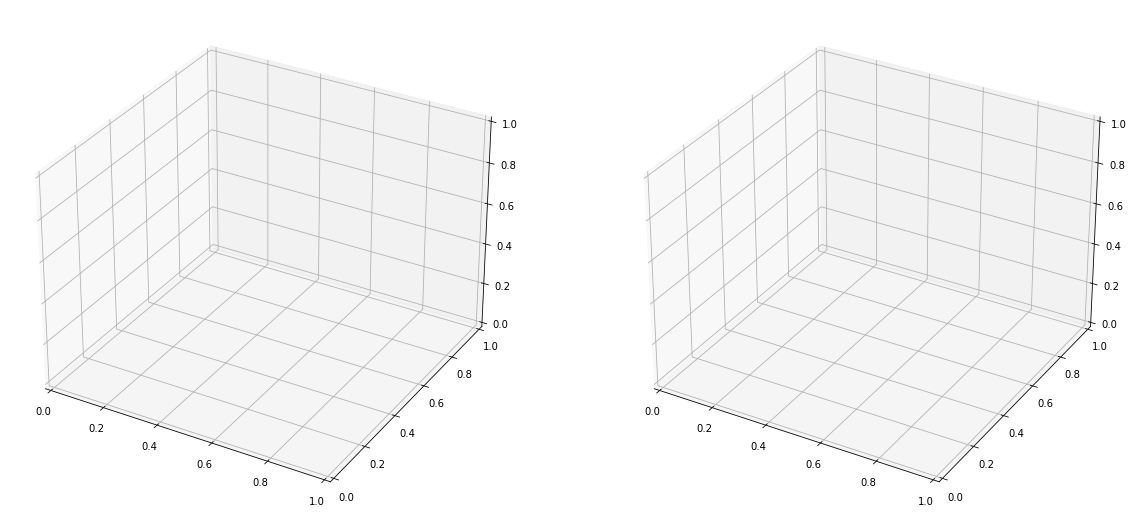

In [86]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 10))

We have input function $$ f(x) = (x + 1)x(x - 1)$$
and constraints $$ g_1(x) = -x -1 \leq 0, g_2(x) = x -1 \leq 0$$

Function to minimize is $$ F_i(x) = f(x) + c_i(max(0, g_1(x))^2 + max(0, g_2(x))^2)$$

In [108]:
def func3(x):
    return (x + 1) * x * (x - 1)

def grad3(x):
    return 3 * x ** 2 - 1 

def constraint3(x):
    return -x - 1 <= 0 and x - 1 <= 0

def penalty3(x):
    return max(0, (-x - 1) ** 2) + max(0, (x - 1) ** 2)

def penalty_grad3(x):
    return 2 * (x + 1) + 2 * (x - 1)

c_1 = 0.5

# def next_c(**kwargs):
    # return 2 ** (kwargs['i'] - 1) * kwargs['penalty_term']

def next_c(**kwargs):
    return kwargs['i']

lr = 0.01
precision = 0.01
start_point = -1.75

algorithm = GDCRegularization(func3, penalty3, grad3, penalty_grad3, constraint3, lr, precision)

gen = algorithm.train(c_1, next_c, start_point)

results = []

for (curr_point, value) in gen:
    results.append((curr_point, value))
    print(algorithm.format())

print(algorithm.format())

F(-1.75) = f(-1.75) + 0.5 * S(-1.75) = 0.453125, g=4.6875, l2=0.046875
F(-1.8) = f(-1.8) + 2 * S(-1.8) = 0.22395706176757812, g=-5.688720703125, l2=0.0600122070312501
F(-1.74) = f(-1.74) + 3 * S(-1.74) = 0.4996321858946109, g=-12.797180956584217, l2=0.12798401659709224
F(-1.61) = f(-1.61) + 4 * S(-1.61) = 1.0216339841867224, g=-18.996469142207197, l2=0.1879487080191644
F(-1.42) = f(-1.42) + 5 * S(-1.42) = 1.568566559700456, g=-23.37433620854362, l2=0.23169207010460058
F(-1.19) = f(-1.19) + 6 * S(-1.19) = 1.9224028711462087, g=-25.283163108732715, l2=0.2545237011919277
F(-0.94) = f(-0.94) + 7 * S(-0.94) = 0.11682611037970236, g=1.6253477168949488, l2=0.01172977597702185
F(-0.95) = f(-0.95) + 8 * S(-0.95) = 0.08966287478747702, g=1.7173686994438162, l2=0.01890346297145995
F(-0.97) = f(-0.97) + 9 * S(-0.97) = 0.059322160395435045, g=1.8163217616742617, l2=0.0170666805882026
F(-0.99) = f(-0.99) + 10 * S(-0.99) = 0.02536698993662316, g=1.9229018957822381, l2=0.016295699546025055
F(-1.01) = 

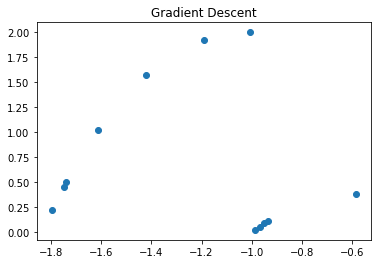

In [109]:
x, y = (zip(*results))
x, y = np.array(x), np.array(y)

plt.scatter(x, y)
_ = plt.title('Gradient Descent')

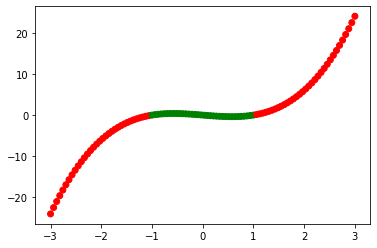

In [116]:
x = np.linspace(-3, 3, 100)
y = [int(constraint3(i)) for i in x]
colors = np.array(['r', 'g'])

plt.scatter(x, [func3(i) for i in x], c=colors[y])

Input function is $$ f(x) = (x + 3)x(x - 3)$$ with constraints $$ g_1(x) = -x -2 \leq 0, g_1(x) = x -2 \leq 0$$ 

Function to minimize is $$ F_i(x) = f(x) + c_i(max(0, g_1(x))^2 + max(0, g_2(x))^2)$$

In [119]:
def func4(x):
    return (x + 3) * x * (x - 3)

def grad4(x):
    return 3 * x ** 2 - 9 

def constraint4(x):
    return -x - 2 <= 0 and x - 2 <= 0

def penalty4(x):
    return max(0, (-x - 2) ** 2) + max(0, (x - 2) ** 2)

def penalty_grad4(x):
    return 2 * (x + 2) + 2 * (x - 2)

c_1 = 1

# def next_c(**kwargs):
    # return 2 ** (kwargs['i'] - 1) * kwargs['penalty_term']

def next_c(**kwargs):
    return kwargs['i']

lr = 0.01
precision = 0.01
start_point = 0

algorithm = GDCRegularization(func4, penalty4, grad4, penalty_grad4, constraint4, lr, precision)

gen = algorithm.train(c_1, next_c, start_point)

results = []

for (curr_point, value) in gen:
    results.append((curr_point, value))
    print(algorithm.format())

print(algorithm.format())

F(0) = f(0) + 1 * S(0) = 0, g=-9, l2=0.09
F(0.09) = f(0.09) + 2 * S(0.09) = -0.809271, g=-8.9757, l2=0.089757
F(0.18) = f(0.18) + 3 * S(0.18) = -1.612004587727889, g=-8.903062262853, l2=0.08878762262853002
F(0.27) = f(0.27) + 4 * S(0.27) = -2.3996695617842327, g=-8.78325964176511, l2=0.08662021904618111
F(0.36) = f(0.36) + 5 * S(0.36) = -3.1642277321046004, g=-8.618466058102362, l2=0.08280487962720473
F(0.44) = f(0.44) + 6 * S(0.44) = -3.8984204355887586, g=-8.41177151573501, l2=0.08692259478455483
F(0.53) = f(0.53) + 7 * S(0.53) = -4.596004653608031, g=-8.167057737316535, l2=0.07859317215772021
F(0.61) = f(0.61) + 8 * S(0.61) = -5.2519243722529865, g=-7.88884305240901, l2=0.07748160268181037
F(0.69) = f(0.69) + 9 * S(0.69) = -5.8624093383855, g=-7.582107137922148, l2=0.07330267406103186
F(0.76) = f(0.76) + 10 * S(0.76) = -6.425000287456324, g=-7.252107083313835, l2=0.0758237448941701
F(0.84) = f(0.84) + 11 * S(0.84) = -6.938506122105156, g=-6.904196002413256, l2=0.06486570491830268
F(

f(1.7320508075688772) = -10.392304845413262
f(-1.7320508075688772) = 10.392304845413264


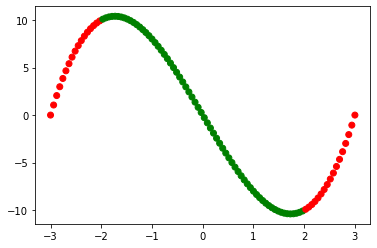

In [120]:
x = np.linspace(-3, 3, 100)
y = [int(constraint4(i)) for i in x]
colors = np.array(['r', 'g'])

plt.scatter(x, [func4(i) for i in x], c=colors[y])

x1, x2 = np.sqrt(3), -np.sqrt(3)
print(f'f({x1}) = {func4(x1)}')
print(f'f({x2}) = {func4(x2)}')